Libraries imported.
Output directories (outputs/, csv_files/) ensured.
Successfully loaded historical_data.csv
Successfully loaded fear_greed_index.csv

Cleaning trader data...
Filtered to 104408 closed trades.
Cleaning sentiment data...
Cleaning complete.

Merging datasets on 'trade_date'...
Merged data saved to csv_files/processed_trade_data.csv

Starting analysis and visualization...
Generating Plot 1: PnL by Sentiment


/tmp/ipython-input-313542261.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='Closed PnL', palette={'Fear': 'crimson', 'Greed': 'green', 'Neutral': 'grey', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen'})


Saved outputs/pnl_by_sentiment.png
Generating Plot 2: Volume by Sentiment


/tmp/ipython-input-313542261.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette={'Fear': 'crimson', 'Greed': 'green', 'Neutral': 'grey', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen'})


Saved outputs/volume_by_sentiment.png
Generating Plot 3: Trade Count by Sentiment


/tmp/ipython-input-313542261.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_by_sentiment, x='classification', y='trade_count', palette={'Fear': 'crimson', 'Greed': 'green', 'Neutral': 'grey', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen'})


Saved outputs/trade_count_by_sentiment.png
Generating Plot 4: Buy/Sell Ratio by Sentiment
Saved outputs/side_by_sentiment.png
Generating Plot 5: PnL Over Time
Saved outputs/pnl_vs_sentiment_timeline.png

Note: A 'Leverage' column was not found in the 'historical_data.csv'.
Analysis on leverage vs. sentiment has been skipped.

Analysis complete. All outputs saved to 'outputs/' and 'csv_files/' directories.


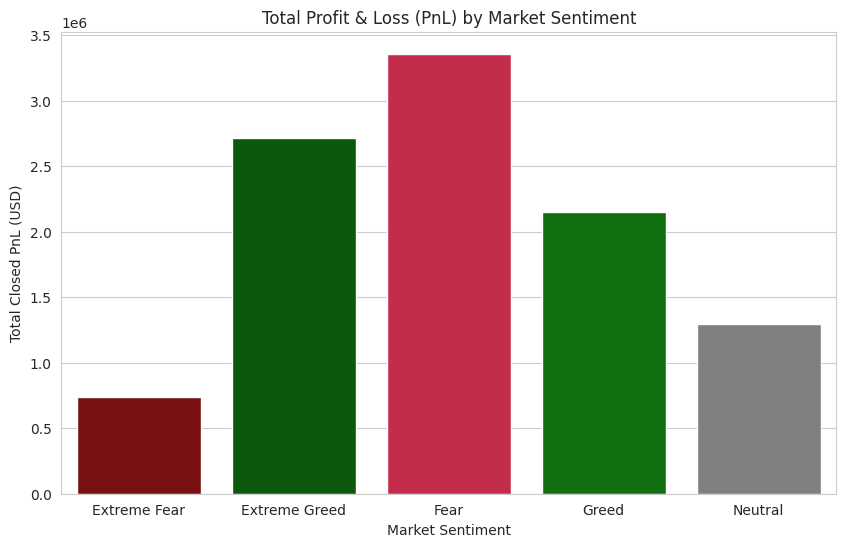

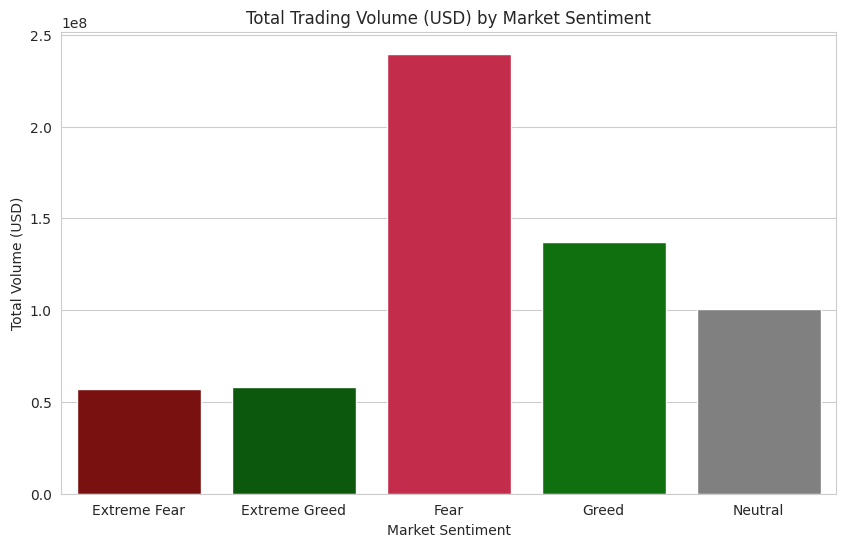

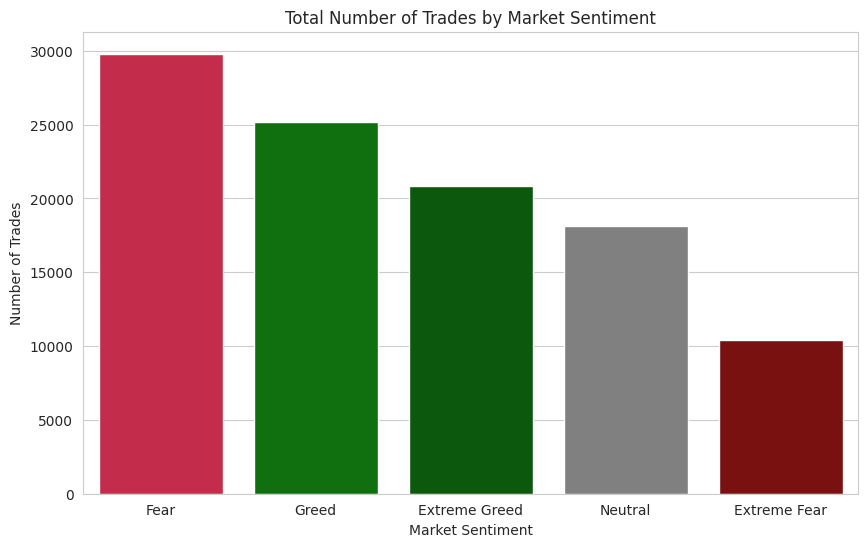

<Figure size 1000x600 with 0 Axes>

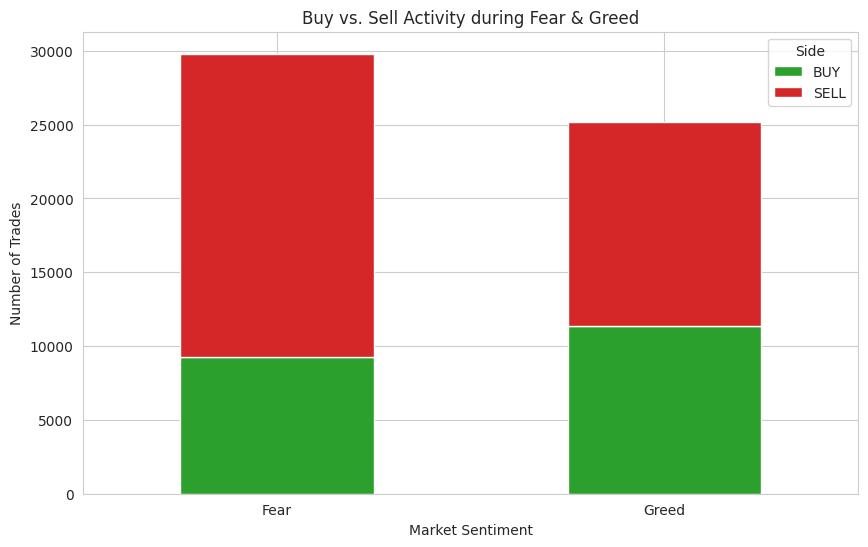

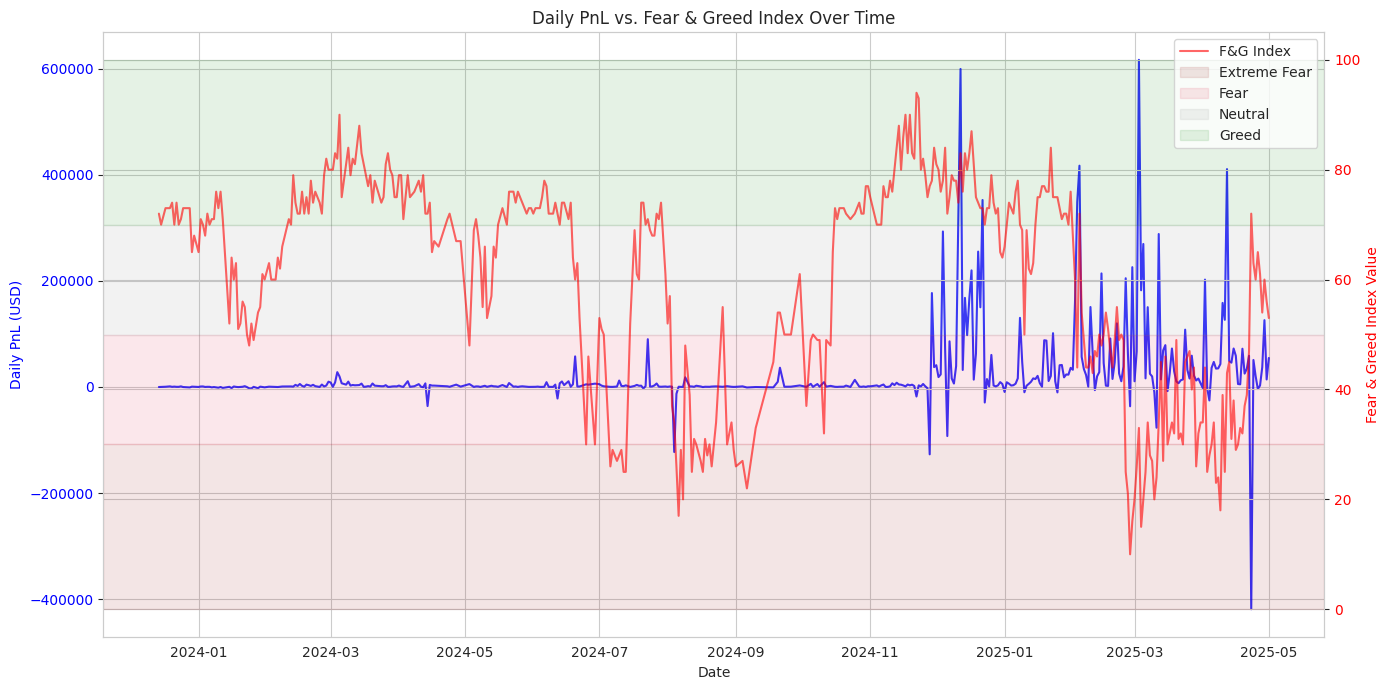

In [ ]:
# =============================================================================
# Assignment: Trader Sentiment Analysis
# Author: [Your Name]
# =============================================================================

# ---------------------------------
# 1. SETUP AND IMPORT LIBRARIES
# ---------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Libraries imported.")

# ---------------------------------
# 2. CREATE OUTPUT DIRECTORIES
# ---------------------------------
# Create directories to store outputs as per the assignment format
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

print("Output directories (outputs/, csv_files/) ensured.")

# ---------------------------------
# 3. LOAD DATASETS
# ---------------------------------
try:
    # Load historical trader data
    df_trades = pd.read_csv('historical_data.csv')
    print("Successfully loaded historical_data.csv")

    # Load fear & greed sentiment data
    df_sentiment = pd.read_csv('fear_greed_index.csv')
    print("Successfully loaded fear_greed_index.csv")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please make sure 'historical_data.csv' and 'fear_greed_index.csv' are uploaded to the Colab environment.")

# ---------------------------------
# 4. DATA CLEANING & PREPARATION
# ---------------------------------

# --- Clean Trader Data (df_trades) ---
print("\nCleaning trader data...")
# Convert Timestamp IST to datetime objects
# Assuming format DD-MM-YYYY HH:MM from the snippet
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Create a 'trade_date' column (Date only) for merging with sentiment data
df_trades['trade_date'] = pd.to_datetime(df_trades['Timestamp IST'].dt.date)

# Convert key numeric columns
df_trades['Closed PnL'] = pd.to_numeric(df_trades['Closed PnL'], errors='coerce')
df_trades['Size USD'] = pd.to_numeric(df_trades['Size USD'], errors='coerce')

# We are interested in *performance*, so let's focus on closed trades
df_closed_trades = df_trades[df_trades['Closed PnL'] != 0].copy()
df_closed_trades = df_closed_trades.dropna(subset=['Closed PnL', 'Size USD'])

print(f"Filtered to {len(df_closed_trades)} closed trades.")

# --- Clean Sentiment Data (df_sentiment) ---
print("Cleaning sentiment data...")
# Convert 'date' column to datetime objects
df_sentiment['trade_date'] = pd.to_datetime(df_sentiment['date'])

# Select relevant columns
df_sentiment = df_sentiment[['trade_date', 'value', 'classification']]

print("Cleaning complete.")

# ---------------------------------
# 5. MERGE DATASETS
# ---------------------------------
print("\nMerging datasets on 'trade_date'...")
# Merge cleaned trade data with sentiment data
df_merged = pd.merge(df_closed_trades, df_sentiment, on='trade_date', how='left')

# Drop rows where sentiment data might be missing (e.g., weekends/holidays if any)
df_merged = df_merged.dropna(subset=['classification'])

# Save processed data to csv_files/ as required
processed_file_path = 'csv_files/processed_trade_data.csv'
df_merged.to_csv(processed_file_path, index=False)
print(f"Merged data saved to {processed_file_path}")

# ---------------------------------
# 6. ANALYSIS & VISUALIZATION
# ---------------------------------
print("\nStarting analysis and visualization...")

# Set standard plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- Analysis 1: Overall Profitability (PnL) vs. Market Sentiment ---
print("Generating Plot 1: PnL by Sentiment")
pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].sum().reset_index()

plt.figure()
sns.barplot(data=pnl_by_sentiment, x='classification', y='Closed PnL', palette={'Fear': 'crimson', 'Greed': 'green', 'Neutral': 'grey', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen'})
plt.title('Total Profit & Loss (PnL) by Market Sentiment')
plt.ylabel('Total Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/pnl_by_sentiment.png')
print("Saved outputs/pnl_by_sentiment.png")

# --- Analysis 2: Trading Volume (Size) vs. Market Sentiment ---
print("Generating Plot 2: Volume by Sentiment")
volume_by_sentiment = df_merged.groupby('classification')['Size USD'].sum().reset_index()

plt.figure()
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette={'Fear': 'crimson', 'Greed': 'green', 'Neutral': 'grey', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen'})
plt.title('Total Trading Volume (USD) by Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/volume_by_sentiment.png')
print("Saved outputs/volume_by_sentiment.png")

# --- Analysis 3: Trader Activity (Count) vs. Market Sentiment ---
print("Generating Plot 3: Trade Count by Sentiment")
activity_by_sentiment = df_merged['classification'].value_counts().reset_index()
activity_by_sentiment.columns = ['classification', 'trade_count']

plt.figure()
sns.barplot(data=activity_by_sentiment, x='classification', y='trade_count', palette={'Fear': 'crimson', 'Greed': 'green', 'Neutral': 'grey', 'Extreme Fear': 'darkred', 'Extreme Greed': 'darkgreen'})
plt.title('Total Number of Trades by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/trade_count_by_sentiment.png')
print("Saved outputs/trade_count_by_sentiment.png")

# --- Analysis 4: Trader Bias (Buy/Sell) vs. Market Sentiment ---
print("Generating Plot 4: Buy/Sell Ratio by Sentiment")
# We will check the 'Side' for BUY or SELL. Let's assume 'BUY' and 'SELL' are the identifiers.
# Focusing on just Fear vs Greed for simplicity
simple_sentiment_df = df_merged[df_merged['classification'].isin(['Fear', 'Greed'])]
side_by_sentiment = simple_sentiment_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)

plt.figure()
side_by_sentiment.plot(kind='bar', stacked=True, color=['#2ca02c', '#d62728'], rot=0)
plt.title('Buy vs. Sell Activity during Fear & Greed')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.legend(title='Side')
plt.savefig('outputs/side_by_sentiment.png')
print("Saved outputs/side_by_sentiment.png")

# --- Analysis 5: PnL Over Time with Sentiment Index ---
print("Generating Plot 5: PnL Over Time")
# Aggregate PnL by date
daily_pnl = df_merged.groupby('trade_date').agg(
    daily_pnl=('Closed PnL', 'sum'),
    sentiment_value=('value', 'mean') # Get the day's sentiment value
).reset_index()

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Daily PnL
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily PnL (USD)', color='blue')
ax1.plot(daily_pnl['trade_date'], daily_pnl['daily_pnl'], color='blue', label='Daily PnL', alpha=0.8)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the sentiment value
ax2 = ax1.twinx()
ax2.set_ylabel('Fear & Greed Index Value', color='red')
ax2.plot(daily_pnl['trade_date'], daily_pnl['sentiment_value'], color='red', label='F&G Index', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='red')

# Add shaded regions for Fear/Greed
ax2.axhspan(0, 30, color='darkred', alpha=0.1, label='Extreme Fear')
ax2.axhspan(30, 50, color='crimson', alpha=0.1, label='Fear')
ax2.axhspan(50, 70, color='grey', alpha=0.1, label='Neutral')
ax2.axhspan(70, 100, color='green', alpha=0.1, label='Greed')

plt.title('Daily PnL vs. Fear & Greed Index Over Time')
fig.tight_layout()
plt.legend()
plt.savefig('outputs/pnl_vs_sentiment_timeline.png')
print("Saved outputs/pnl_vs_sentiment_timeline.png")


# --- Note on Leverage ---
if 'Leverage' in df_merged.columns or 'leverage' in df_merged.columns:
    print("Leverage column found! You can proceed with leverage analysis.")
    # Example (uncomment to run):
    # leverage_by_sentiment = df_merged.groupby('classification')['Leverage'].mean()
    # print(leverage_by_sentiment)
    # leverage_by_sentiment.plot(kind='bar', title='Avg. Leverage by Sentiment')
    # plt.savefig('outputs/leverage_by_sentiment.png')
else:
    print("\nNote: A 'Leverage' column was not found in the 'historical_data.csv'.")
    print("Analysis on leverage vs. sentiment has been skipped.")

print("\n=================================")
print("Analysis complete. All outputs saved to 'outputs/' and 'csv_files/' directories.")
print("=================================")